In [1]:
library(precrec)
library(reticulate)

In [8]:
use_python("/home/dm/anaconda3/envs/attention/bin/python") ###you should change to your Python Path
numpy <- import("numpy")
pandas <- import("pandas")

In [478]:
df <- pandas$read_csv('../data/prep_plot_transferresults_rocprc.csv',index_col=NULL)
df

Cohort    Model                          
1  GSE4607   FAIM3/PLAC8                    
2  GSE4607   SeptiCyte                      
3  GSE4607   sNIP                           
4  GSE8121   FAIM3/PLAC8                    
5  GSE8121   SeptiCyte                      
6  GSE8121   sNIP                           
7  GSE9692   FAIM3/PLAC8                    
8  GSE9692   SeptiCyte                      
9  GSE9692   sNIP                           
10 GSE13904  FAIM3/PLAC8                    
11 GSE13904  SeptiCyte                      
12 GSE13904  sNIP                           
13 GSE26378  FAIM3/PLAC8                    
14 GSE26378  SeptiCyte                      
15 GSE26378  sNIP                           
16 GSE28750  FAIM3/PLAC8                    
17 GSE28750  SeptiCyte                      
18 GSE28750  sNIP                           
19 GSE185263 FAIM3/PLAC8                    
20 GSE185263 SeptiCyte                      
21 GSE185263 sNIP                           
22 GSE4607   CaT                            
23 GSE8121   CaT                            
24 GSE9692   CaT                            
25 GSE13904  CaT                            
26 GSE26378  CaT                            
27 GSE28750  CaT                            
28 GSE4607   K-Nearest Neighbors            
29 GSE8121   K-Nearest Neighbors            
30 GSE9692   K-Nearest Neighbors            
⋮  ⋮         ⋮                              
34 GSE4607   DecisionTree                   
35 GSE8121   DecisionTree                   
36 GSE9692   DecisionTree                   
37 GSE13904  DecisionTree                   
38 GSE26378  DecisionTree                   
39 GSE28750  DecisionTree                   
40 GSE4607   Random Forest                  
41 GSE8121   Random Forest                  
42 GSE9692   Random Forest                  
43 GSE13904  Random Forest                  
44 GSE26378  Random Forest                  
45 GSE28750  Random Forest                  
46 GSE4607   Naive Bayes                    
47 GSE8121   Naive Bayes                    
48 GSE9692   Naive Bayes                    
49 GSE13904  Naive Bayes                    
50 GSE26378  Naive Bayes                    
51 GSE28750  Naive Bayes                    
52 GSE4607   Quadratic Discriminant Analysis
53 GSE8121   Quadratic Discriminant Analysis
54 GSE9692   Quadratic Discriminant Analysis
55 GSE13904  Quadratic Discriminant Analysis
56 GSE26378  Quadratic Discriminant Analysis
57 GSE28750  Quadratic Discriminant Analysis
58 GSE185263 CaT                            
59 GSE185263 K-Nearest Neighbors            
60 GSE185263 DecisionTree                   
61 GSE185263 Random Forest                  
62 GSE185263 Naive Bayes                    
63 GSE185263 Quadratic Discriminant Analysis
   y_test                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]                                

In [244]:
###
df_GSE4607 <- subset(df, Cohort == 'GSE4607')
#df_GSE4607

In [383]:
clean_string <- function(string_value) {
  
  string_value <- gsub("^'|'$", "", string_value)
  string_value <- gsub("\\[|\\]", "", string_value)
  
  numeric_vector <- as.numeric(strsplit(string_value, ",\\s*")[[1]])
  return(numeric_vector)
}

apply_clean_to_df <- function(df, column_name) {
  df[[column_name]] <- lapply(df[[column_name]], clean_string)
  return(df)
}

In [246]:
df_GSE4607 <- apply_clean_to_df(df_GSE4607, "y_test")

In [384]:
convert_to_numeric <- function(char_vector) {
  
  char_vector <- gsub("\n", "", char_vector)
  char_vector <- gsub("\\s+", " ", char_vector)
  char_vector <- gsub("\\[|\\]", "", char_vector)

  num_strings <- strsplit(char_vector, " ")[[1]]
  num_vector <- as.numeric(num_strings)
  return(num_vector)
}

In [252]:
df_GSE4607$Model

[1] "FAIM3/PLAC8"                     "SeptiCyte"                      
[3] "sNIP"                            "CaT"                            
[5] "K-Nearest Neighbors"             "DecisionTree"                   
[7] "Random Forest"                   "Naive Bayes"                    
[9] "Quadratic Discriminant Analysis"

In [259]:
FAIM3_pred <- convert_to_numeric(df_GSE4607$testresult[1])
SeptiCyte_pred <- convert_to_numeric(df_GSE4607$testresult[2])
sNIP_pred <- convert_to_numeric(df_GSE4607$testresult[3])
CaT_pred <- clean_string(df_GSE4607$testresult[4])
KNearest_pred <- clean_string(df_GSE4607$testresult[5])
DecisionTree_pred <- clean_string(df_GSE4607$testresult[6])
RandomForest <- clean_string(df_GSE4607$testresult[7])
NaiveBayes <- clean_string(df_GSE4607$testresult[8])
QDA <- clean_string(df_GSE4607$testresult[9])

In [260]:
df_GSE4607$y_test

[[1]]
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1

[[2]]
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1

[[3]]
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1

[[4]]
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1

[[5]]
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1

[[6]]
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1

[[7]]
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1

[[8]]
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1

[[9]]
  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1

In [261]:
##use presc
label1 <- join_scores(df_GSE4607$y_test[1], df_GSE4607$y_test[2], df_GSE4607$y_test[3]
                      , df_GSE4607$y_test[4], df_GSE4607$y_test[5], df_GSE4607$y_test[6]
                      , df_GSE4607$y_test[7], df_GSE4607$y_test[8], df_GSE4607$y_test[9]
                      )
score1 <- join_scores(FAIM3_pred, SeptiCyte_pred, sNIP_pred
                      , CaT_pred, KNearest_pred, DecisionTree_pred
                      , RandomForest, NaiveBayes, QDA
                      )

In [262]:
df_GSE4607$Model

[1] "FAIM3/PLAC8"                     "SeptiCyte"                      
[3] "sNIP"                            "CaT"                            
[5] "K-Nearest Neighbors"             "DecisionTree"                   
[7] "Random Forest"                   "Naive Bayes"                    
[9] "Quadratic Discriminant Analysis"

In [263]:
# Use a list with multiple score vectors and a list with a single label vector
msmdat1 <- mmdata(score1, label1)

# Explicitly specify model names
msmdat2 <- mmdata(score1, label1, modnames = c("FAIM3/PLAC8", "SeptiCyte", "sNIP", "CaT"
                                              , "K-Nearest Neighbors", "DecisionTree", "Random Forest",
                                               "Naive Bayes", "Quadratic Discriminant Analysis"))

# # Use a sample dataset created by the create_sim_samples function
# msmdat3 <- mmdata(samps2[["scores"]], samps2[["labels"]],
#   modnames = samps2[["modnames"]]
# )

In [264]:
mscurves <- evalmod(msmdat2)

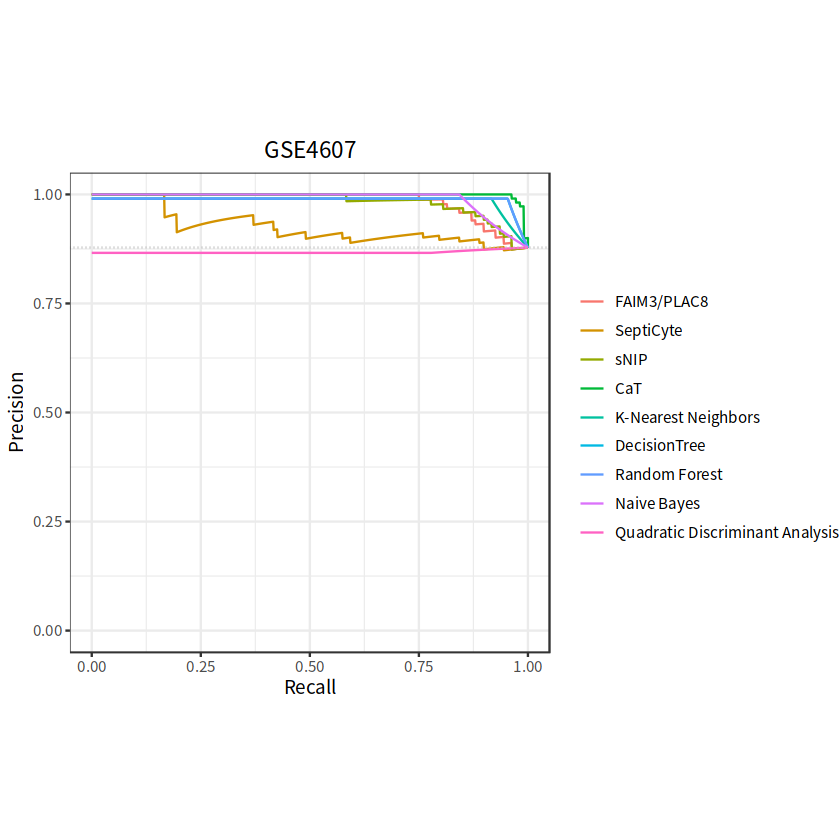

In [293]:
prc_plot <- autoplot(mscurves, "PRC")+ ggtitle("GSE4607") +
  theme(plot.title = element_text(hjust = 0.5))
# ggsave("./transfer_results/GSE4607prc_plot.png", plot = prc_plot, width = 8, height = 6, dpi = 300)
prc_plot

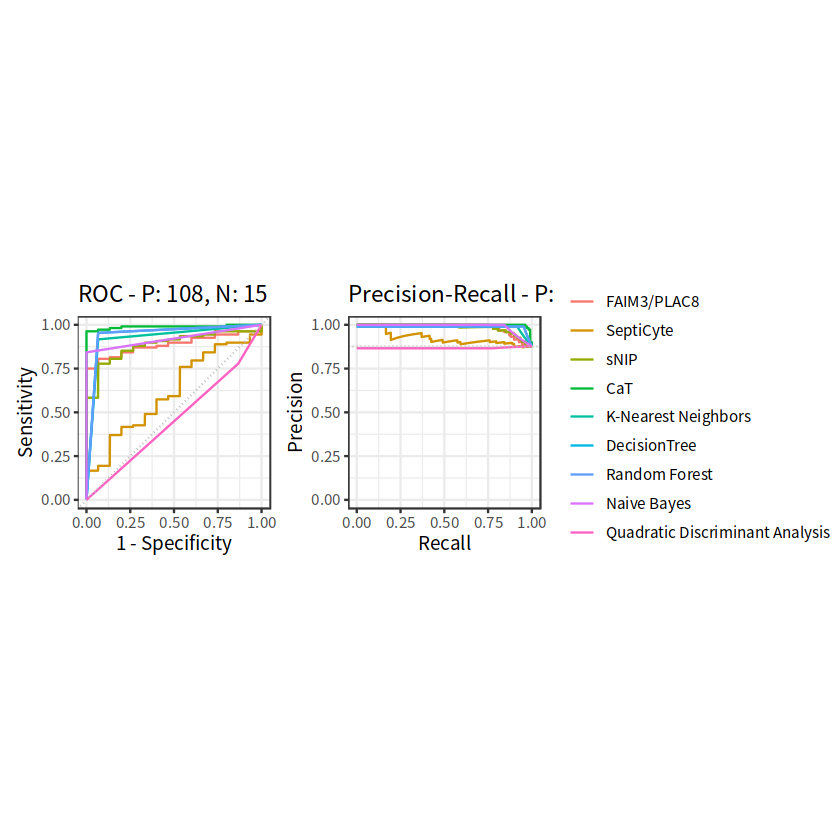

In [265]:
# Show ROC and Precision-Recall curves with the ggplot2 package
autoplot(mscurves)

In [284]:
write.csv(auc(mscurves), "../transfer_results/GSE4607_info.csv", row.names = FALSE)

In [479]:
###
df_GSE8121 <- subset(df, Cohort == 'GSE8121')
df_GSE8121 <- apply_clean_to_df(df_GSE8121, "y_test")

In [480]:
FAIM3_pred_GSE8121 <- convert_to_numeric(df_GSE8121$testresult[1])
SeptiCyte_pred_GSE8121 <- convert_to_numeric(df_GSE8121$testresult[2])
sNIP_pred_GSE8121 <- convert_to_numeric(df_GSE8121$testresult[3])[!is.na(convert_to_numeric(df_GSE8121$testresult[3]))]
CaT_pred_GSE8121 <- clean_string(df_GSE8121$testresult[4])
KNearest_pred_GSE8121 <- clean_string(df_GSE8121$testresult[5])
DecisionTree_pred_GSE8121 <- clean_string(df_GSE8121$testresult[6])
RandomForest_GSE8121 <- clean_string(df_GSE8121$testresult[7])
NaiveBayes_GSE8121 <- clean_string(df_GSE8121$testresult[8])
QDA_GSE8121 <- clean_string(df_GSE8121$testresult[9])

In [481]:
lengths <- sapply(list(FAIM3_pred_GSE8121, SeptiCyte_pred_GSE8121, sNIP_pred_GSE8121, 
                       CaT_pred_GSE8121, KNearest_pred_GSE8121, DecisionTree_pred_GSE8121, 
                       RandomForest_GSE8121, NaiveBayes_GSE8121, QDA_GSE8121), length)
print(lengths)


[1] 75 75 75 75 75 75 75 75 75


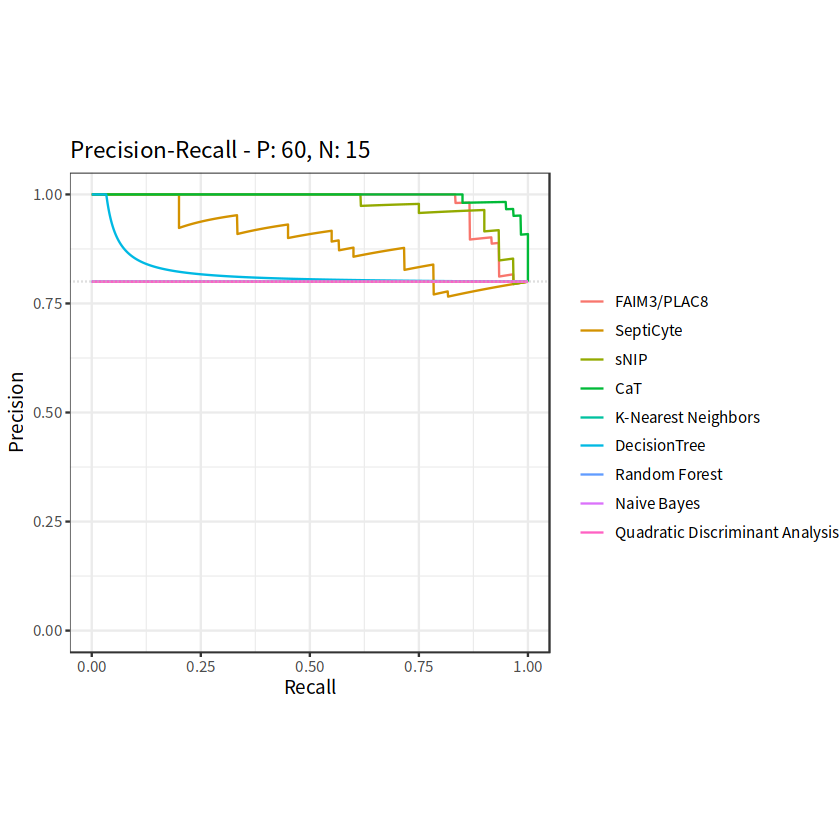

In [482]:
##use presc
label2 <- join_labels(df_GSE8121$y_test[1], df_GSE8121$y_test[2], df_GSE8121$y_test[3]
                      , df_GSE8121$y_test[4], df_GSE8121$y_test[5], df_GSE8121$y_test[6]
                      , df_GSE8121$y_test[7], df_GSE8121$y_test[8], df_GSE8121$y_test[9]
                      )
score2 <- join_scores(FAIM3_pred_GSE8121, SeptiCyte_pred_GSE8121, sNIP_pred_GSE8121
                      , CaT_pred_GSE8121, KNearest_pred_GSE8121, DecisionTree_pred_GSE8121
                      , RandomForest_GSE8121, NaiveBayes_GSE8121, QDA_GSE8121
                      )
# Use a list with multiple score vectors and a list with a single label vector
msmdat11 <- mmdata(score2, label2)

# Explicitly specify model names
msmdat21 <- mmdata(score2, label2, modnames = c("FAIM3/PLAC8", "SeptiCyte", "sNIP", "CaT"
                                              , "K-Nearest Neighbors", "DecisionTree", "Random Forest",
                                               "Naive Bayes", "Quadratic Discriminant Analysis"))
mscurves1 <- evalmod(msmdat21)
autoplot(mscurves1, "PRC")

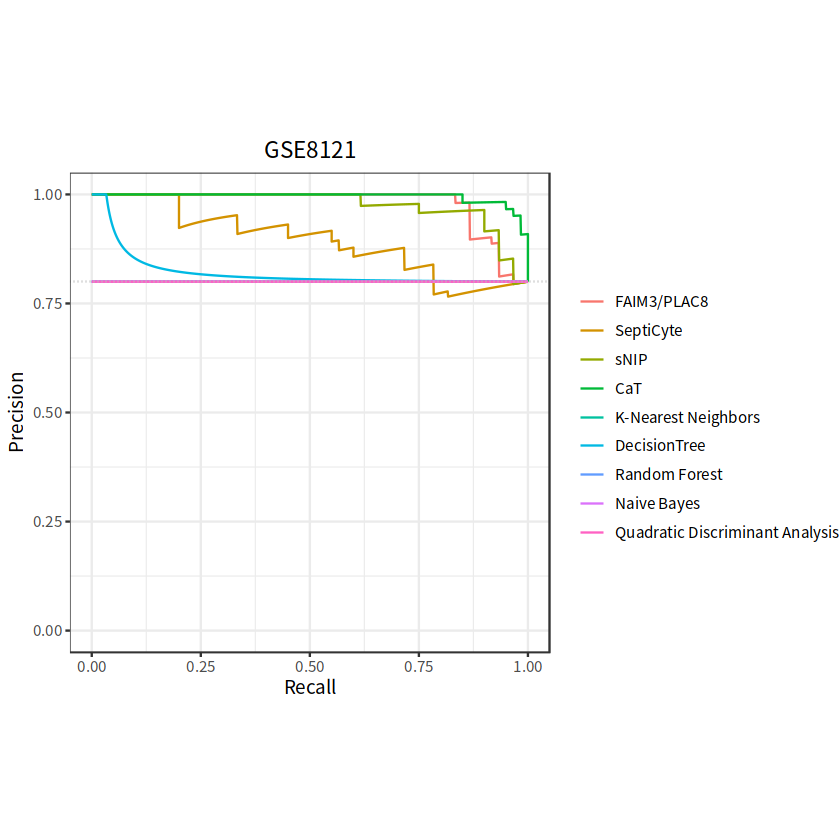

In [483]:
prc_plot <- autoplot(mscurves1, "PRC")+ ggtitle("GSE8121") +
  theme(plot.title = element_text(hjust = 0.5))
# ggsave("./transfer_results/GSE8121prc_plot.png", plot = prc_plot, width = 8, height = 6, dpi = 300)
# write.csv(auc(mscurves1), "./transfer_results/GSE8121_info.csv", row.names = FALSE)
prc_plot

In [484]:
plot_build <- ggplot_build(prc_plot)
plot_data <- plot_build$data[[1]]
colors <- unique(plot_data$colour)

# Print the extracted colors
print(colors)

[1] "#F8766D" "#D39200" "#93AA00" "#00BA38" "#00C19F" "#00B9E3" "#619CFF"
[8] "#DB72FB" "#FF61C3"


In [318]:
#####
df_GSE9692 <- subset(df, Cohort == 'GSE9692')
df_GSE9692 <- apply_clean_to_df(df_GSE9692, "y_test")

In [322]:
dataset_name <- "GSE9692"

# 
df <- get(paste0("df_", dataset_name))

FAIM3_pred <- convert_to_numeric(df$testresult[1])
SeptiCyte_pred <- convert_to_numeric(df$testresult[2])
sNIP_pred <- convert_to_numeric(df$testresult[3])[!is.na(convert_to_numeric(df$testresult[3]))]
CaT_pred <- clean_string(df$testresult[4])
KNearest_pred <- clean_string(df$testresult[5])
DecisionTree_pred <- clean_string(df$testresult[6])
RandomForest_pred <- clean_string(df$testresult[7])
NaiveBayes_pred <- clean_string(df$testresult[8])
QDA_pred <- clean_string(df$testresult[9])

# 
assign(paste0("FAIM3_pred_", dataset_name), FAIM3_pred)
assign(paste0("SeptiCyte_pred_", dataset_name), SeptiCyte_pred)
assign(paste0("sNIP_pred_", dataset_name), sNIP_pred)
assign(paste0("CaT_pred_", dataset_name), CaT_pred)
assign(paste0("KNearest_pred_", dataset_name), KNearest_pred)
assign(paste0("DecisionTree_pred_", dataset_name), DecisionTree_pred)
assign(paste0("RandomForest_pred_", dataset_name), RandomForest_pred)
assign(paste0("NaiveBayes_pred_", dataset_name), NaiveBayes_pred)
assign(paste0("QDA_pred_", dataset_name), QDA_pred)

# 
label3 <- join_labels(df$y_test[1], df$y_test[2], df$y_test[3],
                      df$y_test[4], df$y_test[5], df$y_test[6],
                      df$y_test[7], df$y_test[8], df$y_test[9])

#
score3 <- join_scores(get(paste0("FAIM3_pred_", dataset_name)), 
                      get(paste0("SeptiCyte_pred_", dataset_name)), 
                      get(paste0("sNIP_pred_", dataset_name)), 
                      get(paste0("CaT_pred_", dataset_name)), 
                      get(paste0("KNearest_pred_", dataset_name)), 
                      get(paste0("DecisionTree_pred_", dataset_name)), 
                      get(paste0("RandomForest_pred_", dataset_name)), 
                      get(paste0("NaiveBayes_pred_", dataset_name)), 
                      get(paste0("QDA_pred_", dataset_name)))

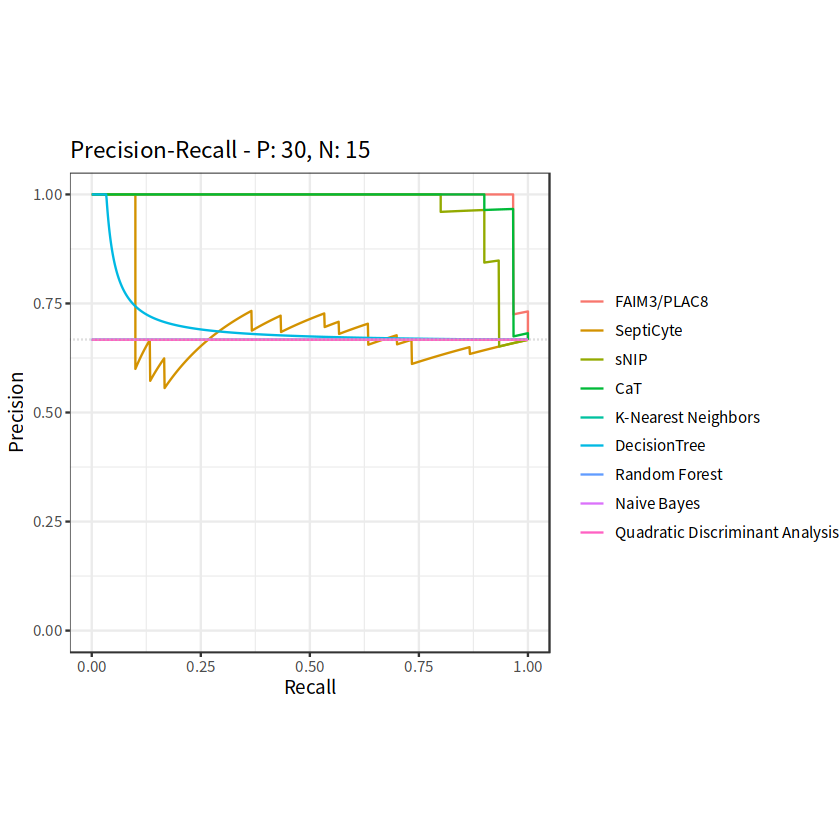

In [323]:
msmdat13 <- mmdata(score3, label3)

# Explicitly specify model names
msmdat23 <- mmdata(score3, label3, modnames = c("FAIM3/PLAC8", "SeptiCyte", "sNIP", "CaT"
                                              , "K-Nearest Neighbors", "DecisionTree", "Random Forest",
                                               "Naive Bayes", "Quadratic Discriminant Analysis"))
mscurves3 <- evalmod(msmdat23)
autoplot(mscurves3, "PRC")

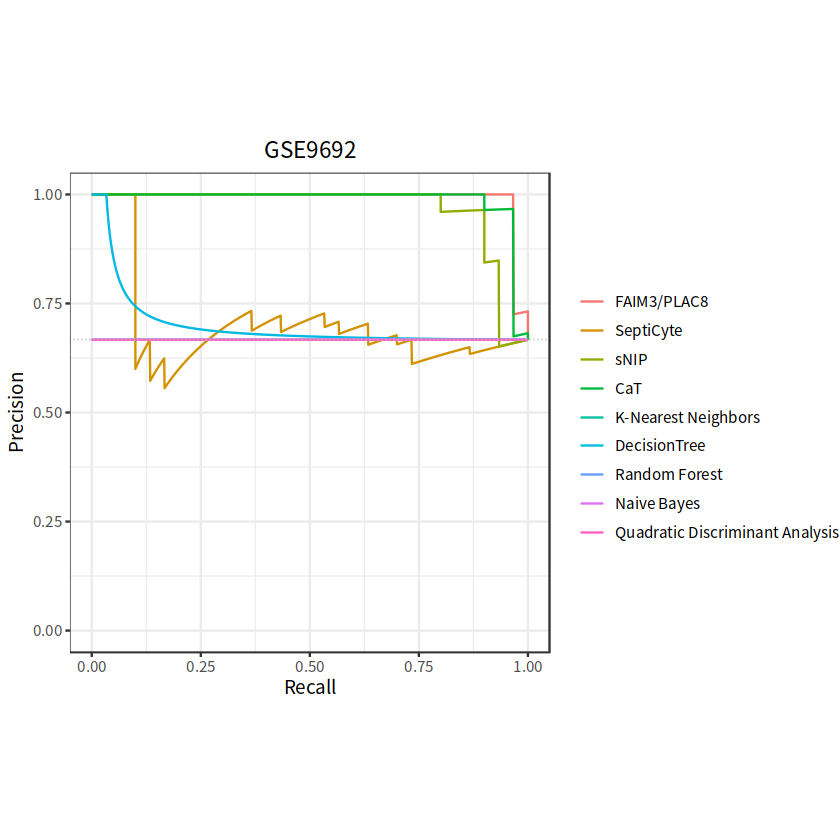

In [325]:
prc_plot <- autoplot(mscurves3, "PRC")+ ggtitle("GSE9692") +
  theme(plot.title = element_text(hjust = 0.5))
ggsave("../transfer_results/GSE9692prc_plot.png", plot = prc_plot, width = 8, height = 6, dpi = 300)
write.csv(auc(mscurves3), "../transfer_results/GSE9692_info.csv", row.names = FALSE)
prc_plot

In [337]:
########第
df_GSE13904 <- subset(df, Cohort == 'GSE13904')
df_GSE13904 <- apply_clean_to_df(df_GSE13904, "y_test")
df_GSE13904

,Cohort,Model,y_test,testresult
,<chr>,<chr>,<list>,<chr>
10,GSE13904,FAIM3/PLAC8,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1",[-1.59158585 -1.29524009 -1.07676607 -1.07618573 -1.47283201 -1.40825397 -1.2437521 -0.87207621 -0.76917518 -1.10812294 -0.64609974 -0.7351552 -1.27819257 -0.67265771 -1.12247295 -1.16901004 -0.82841261 -0.87509833 -0.39166806 -0.10689941 -0.57928429 -0.32816304 -1.1183223 -0.22700469 -0.40834667 -0.25474948 -0.21488783 -1.11101623 -0.35313448 -0.40168683 -1.00412773 -0.6573153 -0.18245614 -0.40520475 -0.26267642 -0.61065771 -0.2830119 -0.1895533 -0.84120448 -0.91028781 -1.5988024 -0.47023659 -0.52405019 -0.8550006 -0.26737116 -0.13701393 -0.43078988 -0.12971203 -1.24653396 -0.16991015 -0.83437827 -1.20337909 -0.36288171 -1.28008248 -0.22507801 -0.34132597 -0.32365481 -1.54594839 -0.37164322 -0.13466117 -0.1525839 -1.06838738 -0.64391328 -0.20706909 -0.46702638 -1.36544161 -0.35252709 -1.34138702 -0.87831156 -0.56856437]
11,GSE13904,SeptiCyte,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1",[0.87652408 0.19895164 1.69195573 1.5575759 2.28676017 2.42134091 0.72073094 0.7337272 0.63118793 0.63504547 0.35310088 0.60290739 1.03662218 0.80823672 1.33138364 1.82427121 1.8953379 0.56890444 0.25989736 1.45746371 1.82084053 1.67298574 0.43845091 2.03132031 0.41333417 0.85528557 3.06395898 0.28162011 1.36235684 1.38710643 0.64777878 0.90546423 2.51804634 1.41526747 1.04300098 0.13007268 0.44079348 1.19786735 0.70378062 0.29021452 0.25782094 2.50985819 0.70231367 0.59316224 1.77965852 1.29403801 0.33998242 0.22144043 2.11040874 2.49822263 0.72856678 0.19214953 1.25484018 1.00013945 0.61186731 1.74589483 1.16310517 0.23073478 0.44772686 1.99070378 1.28745817 0.29237813 3.61063186 1.05410528 0.13235846 0.6931251 0.94334794 1.92448763 2.48652821 2.41106615]
12,GSE13904,sNIP,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1",[ 0.14369622 0.33927448 0.02800771 -0.20154363 0.0786237 0.33693122 -0.03698308 0.20711066 -0.1253226 -0.2090011 -0.13235294 0.16452991 0.12275768 0.06299493 0.09353242 -0.13639407 0.16438855 0.08609387 0.15526184 0.69762402 0.50230874 0.15017041 0.32715232 0.67818173 1.08937585 1.31430259 0.3844164 1.05380017 0.28800135 0.15931164 0.16876947 -0.51592713 0.57774123 0.57336395 0.16718941 -0.16634662 0.13693827 0.54388245 0.11259812 0.29118187 -0.49119942 0.52854256 0.08112583 0.47539001 2.10118703 0.45676292 -0.06690951 0.48560154 0.05003485 0.86562714 0.23310693 0.38416051 0.31900385 0.63901019 0.67235999 0.56906077 0.47353719 0.54934359 0.71003836 0.32988793 0.95571785 -0.00375028 0.29163643 0.3697479 0.49430456 0.36484884 0.41714783 1.04977629 0.21289942 0.74968205]
25,GSE13904,CaT,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1","[0.02897917, 0.03248768, 0.022747518, 0.03296969, 0.017852617, 0.015972195, 0.031297673, 0.027456637, 0.031796586, 0.02435546, 0.032333013, 0.03579205, 0.027399067, 0.078829974, 0.027451253, 0.02922976, 0.028344179, 0.028335247, 0.24886695, 0.99998283, 0.88472736, 0.9851112, 0.06893132, 0.99964, 0.5504963, 0.9998758, 0.9990472, 0.11241871, 0.2787452, 0.10000828, 0.07781376, 0.95643747, 0.84769773, 0.65658414, 0.93043876, 0.93744975, 0.39358696, 0.9974261, 0.05789746, 0.061856437, 0.4806724, 0.99636805, 0.2717259, 0.050176196, 0.8966392, 0.99996984, 0.077600844, 0.8908468, 0.015486888, 0.9999939, 0.07812349, 0.03759289, 0.7586764, 

In [338]:
dataset_name <- "GSE13904"

# 
df <- get(paste0("df_", dataset_name))

FAIM3_pred <- convert_to_numeric(df$testresult[1])
SeptiCyte_pred <- convert_to_numeric(df$testresult[2])
sNIP_pred <- convert_to_numeric(df$testresult[3])[!is.na(convert_to_numeric(df$testresult[3]))]
CaT_pred <- clean_string(df$testresult[4])
KNearest_pred <- clean_string(df$testresult[5])
DecisionTree_pred <- clean_string(df$testresult[6])
RandomForest_pred <- clean_string(df$testresult[7])
NaiveBayes_pred <- clean_string(df$testresult[8])
QDA_pred <- clean_string(df$testresult[9])

# 
assign(paste0("FAIM3_pred_", dataset_name), FAIM3_pred)
assign(paste0("SeptiCyte_pred_", dataset_name), SeptiCyte_pred)
assign(paste0("sNIP_pred_", dataset_name), sNIP_pred)
assign(paste0("CaT_pred_", dataset_name), CaT_pred)
assign(paste0("KNearest_pred_", dataset_name), KNearest_pred)
assign(paste0("DecisionTree_pred_", dataset_name), DecisionTree_pred)
assign(paste0("RandomForest_pred_", dataset_name), RandomForest_pred)
assign(paste0("NaiveBayes_pred_", dataset_name), NaiveBayes_pred)
assign(paste0("QDA_pred_", dataset_name), QDA_pred)

# 
label4 <- join_labels(df$y_test[1], df$y_test[2], df$y_test[3],
                      df$y_test[4], df$y_test[5], df$y_test[6],
                      df$y_test[7], df$y_test[8], df$y_test[9])

#
score4 <- join_scores(get(paste0("FAIM3_pred_", dataset_name)), 
                      get(paste0("SeptiCyte_pred_", dataset_name)), 
                      get(paste0("sNIP_pred_", dataset_name)), 
                      get(paste0("CaT_pred_", dataset_name)), 
                      get(paste0("KNearest_pred_", dataset_name)), 
                      get(paste0("DecisionTree_pred_", dataset_name)), 
                      get(paste0("RandomForest_pred_", dataset_name)), 
                      get(paste0("NaiveBayes_pred_", dataset_name)), 
                      get(paste0("QDA_pred_", dataset_name)))

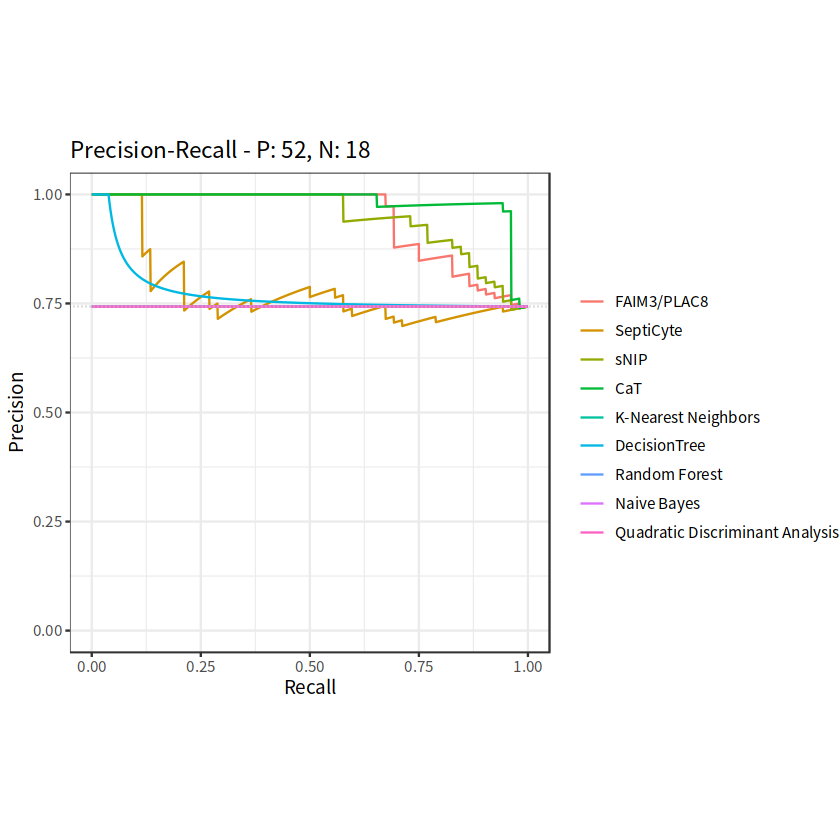

In [339]:
msmdat14 <- mmdata(score4, label4)

# Explicitly specify model names
msmdat24 <- mmdata(score4, label4, modnames = c("FAIM3/PLAC8", "SeptiCyte", "sNIP", "CaT"
                                              , "K-Nearest Neighbors", "DecisionTree", "Random Forest",
                                               "Naive Bayes", "Quadratic Discriminant Analysis"))
mscurves4 <- evalmod(msmdat24)
autoplot(mscurves4, "PRC")

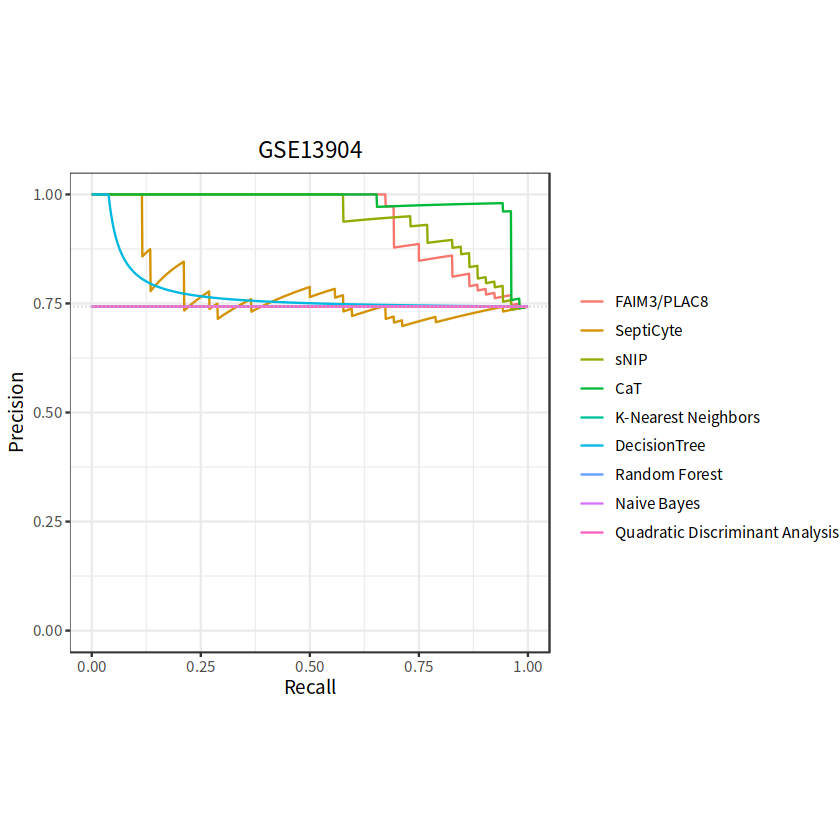

In [340]:
prc_plot4 <- autoplot(mscurves4, "PRC")+ ggtitle("GSE13904") +
  theme(plot.title = element_text(hjust = 0.5))
ggsave("../transfer_results/GSE13904prc_plot.png", plot = prc_plot4, width = 8, height = 6, dpi = 300)
write.csv(auc(mscurves4), "../transfer_results/GSE13904_info.csv", row.names = FALSE)
prc_plot4

In [346]:
unique(df$Cohort)

[1] "GSE13904"

In [349]:
########
df <- pandas$read_csv('../data/prep_plot_transferresults_rocprc.csv',index_col=NULL)
df_GSE26378 <- subset(df, Cohort == 'GSE26378')
df_GSE26378 <- apply_clean_to_df(df_GSE26378, "y_test")
#df_GSE26378

In [351]:
dataset_name <- "GSE26378"

# 
df <- get(paste0("df_", dataset_name))

FAIM3_pred <- convert_to_numeric(df$testresult[1])
SeptiCyte_pred <- convert_to_numeric(df$testresult[2])
sNIP_pred <- convert_to_numeric(df$testresult[3])[!is.na(convert_to_numeric(df$testresult[3]))]
CaT_pred <- clean_string(df$testresult[4])
KNearest_pred <- clean_string(df$testresult[5])
DecisionTree_pred <- clean_string(df$testresult[6])
RandomForest_pred <- clean_string(df$testresult[7])
NaiveBayes_pred <- clean_string(df$testresult[8])
QDA_pred <- clean_string(df$testresult[9])

# 
assign(paste0("FAIM3_pred_", dataset_name), FAIM3_pred)
assign(paste0("SeptiCyte_pred_", dataset_name), SeptiCyte_pred)
assign(paste0("sNIP_pred_", dataset_name), sNIP_pred)
assign(paste0("CaT_pred_", dataset_name), CaT_pred)
assign(paste0("KNearest_pred_", dataset_name), KNearest_pred)
assign(paste0("DecisionTree_pred_", dataset_name), DecisionTree_pred)
assign(paste0("RandomForest_pred_", dataset_name), RandomForest_pred)
assign(paste0("NaiveBayes_pred_", dataset_name), NaiveBayes_pred)
assign(paste0("QDA_pred_", dataset_name), QDA_pred)

# 
label5 <- join_labels(df$y_test[1], df$y_test[2], df$y_test[3],
                      df$y_test[4], df$y_test[5], df$y_test[6],
                      df$y_test[7], df$y_test[8], df$y_test[9])

# 
score5 <- join_scores(get(paste0("FAIM3_pred_", dataset_name)), 
                      get(paste0("SeptiCyte_pred_", dataset_name)), 
                      get(paste0("sNIP_pred_", dataset_name)), 
                      get(paste0("CaT_pred_", dataset_name)), 
                      get(paste0("KNearest_pred_", dataset_name)), 
                      get(paste0("DecisionTree_pred_", dataset_name)), 
                      get(paste0("RandomForest_pred_", dataset_name)), 
                      get(paste0("NaiveBayes_pred_", dataset_name)), 
                      get(paste0("QDA_pred_", dataset_name)))

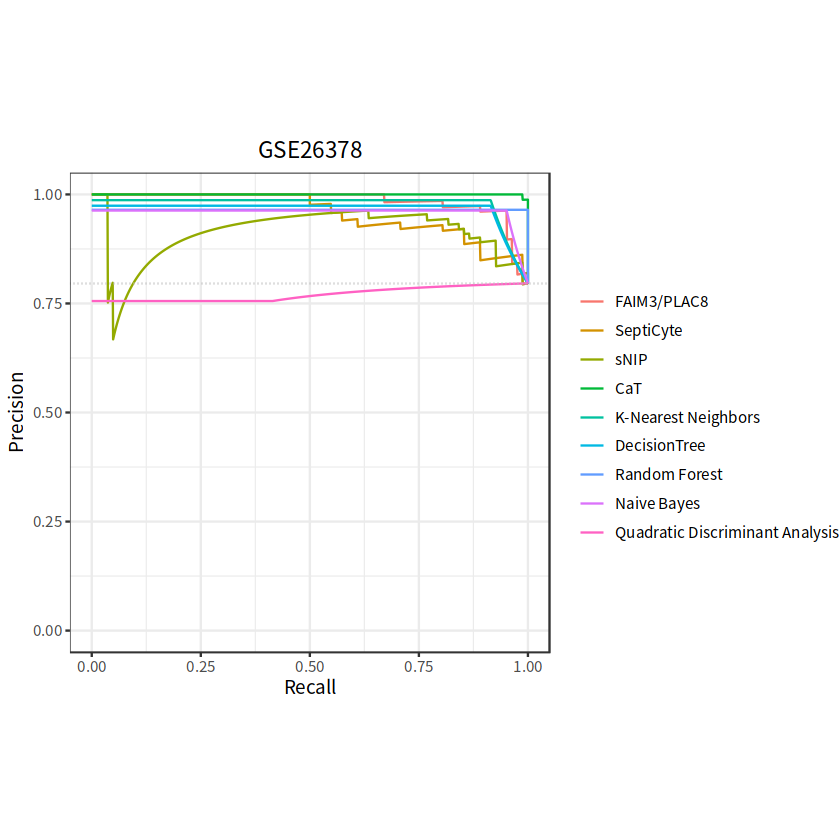

In [352]:
msmdat15 <- mmdata(score5, label5)

# Explicitly specify model names
msmdat25 <- mmdata(score5, label5, modnames = c("FAIM3/PLAC8", "SeptiCyte", "sNIP", "CaT"
                                              , "K-Nearest Neighbors", "DecisionTree", "Random Forest",
                                               "Naive Bayes", "Quadratic Discriminant Analysis"))
mscurves5 <- evalmod(msmdat25)
prc_plot5 <- autoplot(mscurves5, "PRC")+ ggtitle("GSE26378") +
  theme(plot.title = element_text(hjust = 0.5))
ggsave("../transfer_results/GSE26378prc_plot.png", plot = prc_plot5, width = 8, height = 6, dpi = 300)
write.csv(auc(mscurves5), "../transfer_results/GSE26378_info.csv", row.names = FALSE)
prc_plot5

In [353]:
########
df <- pandas$read_csv('../data/prep_plot_transferresults_rocprc.csv',index_col=NULL)
df_GSE28750 <- subset(df, Cohort == 'GSE28750')
df_GSE28750 <- apply_clean_to_df(df_GSE28750, "y_test")
#df_GSE26378

In [354]:
dataset_name <- "GSE28750"

# 
df <- get(paste0("df_", dataset_name))

FAIM3_pred <- convert_to_numeric(df$testresult[1])
SeptiCyte_pred <- convert_to_numeric(df$testresult[2])
sNIP_pred <- convert_to_numeric(df$testresult[3])[!is.na(convert_to_numeric(df$testresult[3]))]
CaT_pred <- clean_string(df$testresult[4])
KNearest_pred <- clean_string(df$testresult[5])
DecisionTree_pred <- clean_string(df$testresult[6])
RandomForest_pred <- clean_string(df$testresult[7])
NaiveBayes_pred <- clean_string(df$testresult[8])
QDA_pred <- clean_string(df$testresult[9])

# 
assign(paste0("FAIM3_pred_", dataset_name), FAIM3_pred)
assign(paste0("SeptiCyte_pred_", dataset_name), SeptiCyte_pred)
assign(paste0("sNIP_pred_", dataset_name), sNIP_pred)
assign(paste0("CaT_pred_", dataset_name), CaT_pred)
assign(paste0("KNearest_pred_", dataset_name), KNearest_pred)
assign(paste0("DecisionTree_pred_", dataset_name), DecisionTree_pred)
assign(paste0("RandomForest_pred_", dataset_name), RandomForest_pred)
assign(paste0("NaiveBayes_pred_", dataset_name), NaiveBayes_pred)
assign(paste0("QDA_pred_", dataset_name), QDA_pred)

# 
label6 <- join_labels(df$y_test[1], df$y_test[2], df$y_test[3],
                      df$y_test[4], df$y_test[5], df$y_test[6],
                      df$y_test[7], df$y_test[8], df$y_test[9])

score6 <- join_scores(get(paste0("FAIM3_pred_", dataset_name)), 
                      get(paste0("SeptiCyte_pred_", dataset_name)), 
                      get(paste0("sNIP_pred_", dataset_name)), 
                      get(paste0("CaT_pred_", dataset_name)), 
                      get(paste0("KNearest_pred_", dataset_name)), 
                      get(paste0("DecisionTree_pred_", dataset_name)), 
                      get(paste0("RandomForest_pred_", dataset_name)), 
                      get(paste0("NaiveBayes_pred_", dataset_name)), 
                      get(paste0("QDA_pred_", dataset_name)))

Warning message in convert_to_numeric1(df$testresult[4]):
“强制改变过程中产生了NA”
Warning message in convert_to_numeric1(df$testresult[5]):
“强制改变过程中产生了NA”
Warning message in convert_to_numeric1(df$testresult[6]):
“强制改变过程中产生了NA”
Warning message in convert_to_numeric1(df$testresult[7]):
“强制改变过程中产生了NA”
Warning message in convert_to_numeric1(df$testresult[8]):
“强制改变过程中产生了NA”
Warning message in convert_to_numeric1(df$testresult[9]):
“强制改变过程中产生了NA”


ERROR: Error: All vectors must be the same lengths


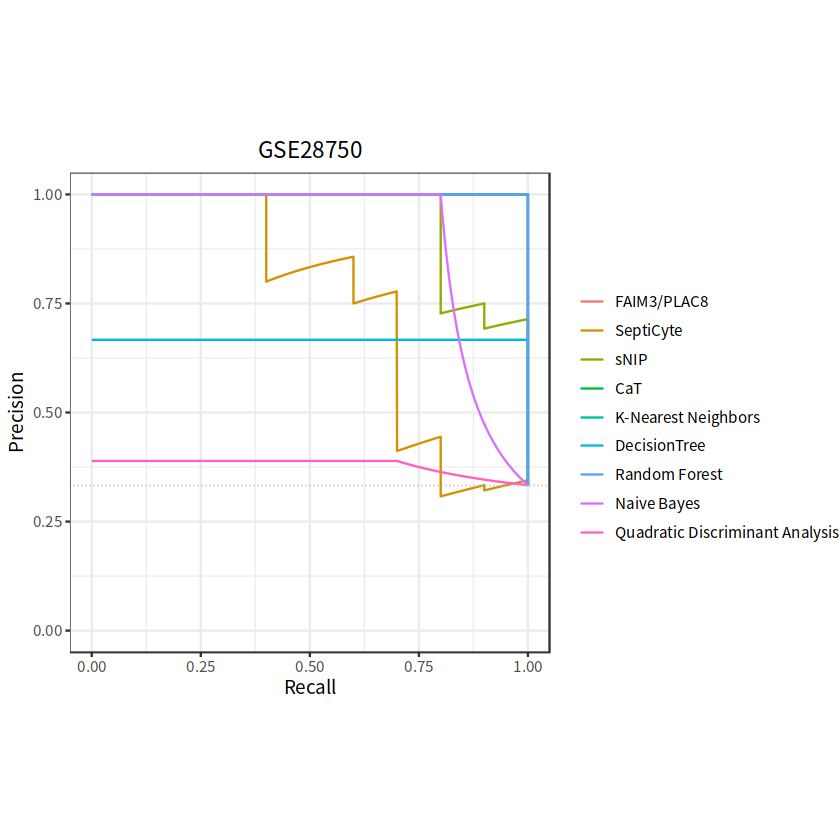

In [355]:
msmdat16 <- mmdata(score6, label6)

# Explicitly specify model names
msmdat26 <- mmdata(score6, label6, modnames = c("FAIM3/PLAC8", "SeptiCyte", "sNIP", "CaT"
                                              , "K-Nearest Neighbors", "DecisionTree", "Random Forest",
                                               "Naive Bayes", "Quadratic Discriminant Analysis"))
mscurves6 <- evalmod(msmdat26)
prc_plot6 <- autoplot(mscurves6, "PRC")+ ggtitle("GSE28750") +
  theme(plot.title = element_text(hjust = 0.5))
ggsave(".//transfer_results/GSE28750prc_plot.png", plot = prc_plot6, width = 8, height = 6, dpi = 300)
write.csv(auc(mscurves6), ".//transfer_results/GSGSE28750_info.csv", row.names = FALSE)
prc_plot6

In [493]:
########
df <- pandas$read_csv('../data/prep_plot_transferresults_rocprc.csv',index_col=NULL)
df_GSE185263 <- subset(df, Cohort == 'GSE185263')
#df_GSE185263 <- apply_clean_to_df(df_GSE185263, "y_test")
#df_GSE185263$testresult

In [494]:
convert_to_numeric1 <- function(char_vector) {
  clean_vector <- gsub("\\[|\\]|\\n", "", char_vector)
  numeric_vector <- as.numeric(unlist(strsplit(clean_vector, " ")))
  
  return(numeric_vector)
}
apply_clean_to_df1 <- function(df, column_name) {
  df[[column_name]] <- lapply(df[[column_name]], convert_to_numeric1)
  return(df)
}

In [495]:
df_GSE185263 <- apply_clean_to_df1(df_GSE185263, "y_test")

In [496]:
dataset_name <- "GSE185263"

# 
df <- get(paste0("df_", dataset_name))

FAIM3_pred <- convert_to_numeric(df$testresult[1])
SeptiCyte_pred <- convert_to_numeric(df$testresult[2])
sNIP_pred <- convert_to_numeric(df$testresult[3])
CaT_pred <- clean_string(df$testresult[4])
KNearest_pred <- convert_to_numeric1(df$testresult[5])
DecisionTree_pred <- convert_to_numeric1(df$testresult[6])
RandomForest_pred <- convert_to_numeric1(df$testresult[7])
NaiveBayes_pred <- convert_to_numeric1(df$testresult[8])
QDA_pred <- convert_to_numeric1(df$testresult[9])

# 
assign(paste0("FAIM3_pred_", dataset_name), FAIM3_pred)
assign(paste0("SeptiCyte_pred_", dataset_name), SeptiCyte_pred)
assign(paste0("sNIP_pred_", dataset_name), sNIP_pred)
assign(paste0("CaT_pred_", dataset_name), CaT_pred)
assign(paste0("KNearest_pred_", dataset_name), KNearest_pred)
assign(paste0("DecisionTree_pred_", dataset_name), DecisionTree_pred)
assign(paste0("RandomForest_pred_", dataset_name), RandomForest_pred)
assign(paste0("NaiveBayes_pred_", dataset_name), NaiveBayes_pred)
assign(paste0("QDA_pred_", dataset_name), QDA_pred)

# 
label7 <- join_labels(df$y_test[1], df$y_test[2], df$y_test[3])

# 
score7 <- join_scores(get(paste0("FAIM3_pred_", dataset_name)), 
                      get(paste0("SeptiCyte_pred_", dataset_name)), 
                      get(paste0("sNIP_pred_", dataset_name)))

label8 <- join_labels(
                      df$y_test[4], df$y_test[5], df$y_test[6],
                      df$y_test[7], df$y_test[8], df$y_test[9])

#
score8 <- join_scores( 
                      get(paste0("CaT_pred_", dataset_name)), 
                      get(paste0("KNearest_pred_", dataset_name)), 
                      get(paste0("DecisionTree_pred_", dataset_name)), 
                      get(paste0("RandomForest_pred_", dataset_name)), 
                      get(paste0("NaiveBayes_pred_", dataset_name)), 
                      get(paste0("QDA_pred_", dataset_name)))

In [407]:
lengths <- sapply(list(FAIM3_pred_GSE185263, SeptiCyte_pred_GSE185263, sNIP_pred_GSE185263, 
                       CaT_pred_GSE185263, KNearest_pred_GSE185263, DecisionTree_pred_GSE185263, 
                       RandomForest_pred_GSE185263, NaiveBayes_pred_GSE185263, QDA_pred_GSE185263), length)
print(lengths)


[1] 392 392 392 275 275 275 275 275 275


In [410]:
lengths <- sapply(list(df_GSE185263$y_test[1], df_GSE185263$y_test[2], df_GSE185263$y_test[3], 
                       df_GSE185263$y_test[4], df_GSE185263$y_test[5], df_GSE185263$y_test[6], 
                       df_GSE185263$y_test[7], df_GSE185263$y_test[8], df_GSE185263$y_test[9]), length)
print(lengths)

[1] 1 1 1 1 1 1 1 1 1


In [497]:
custom_colors <- c("FAIM3/PLAC8" = "#F8766D","SeptiCyte" = "#D39200","sNIP" = "#93AA00")

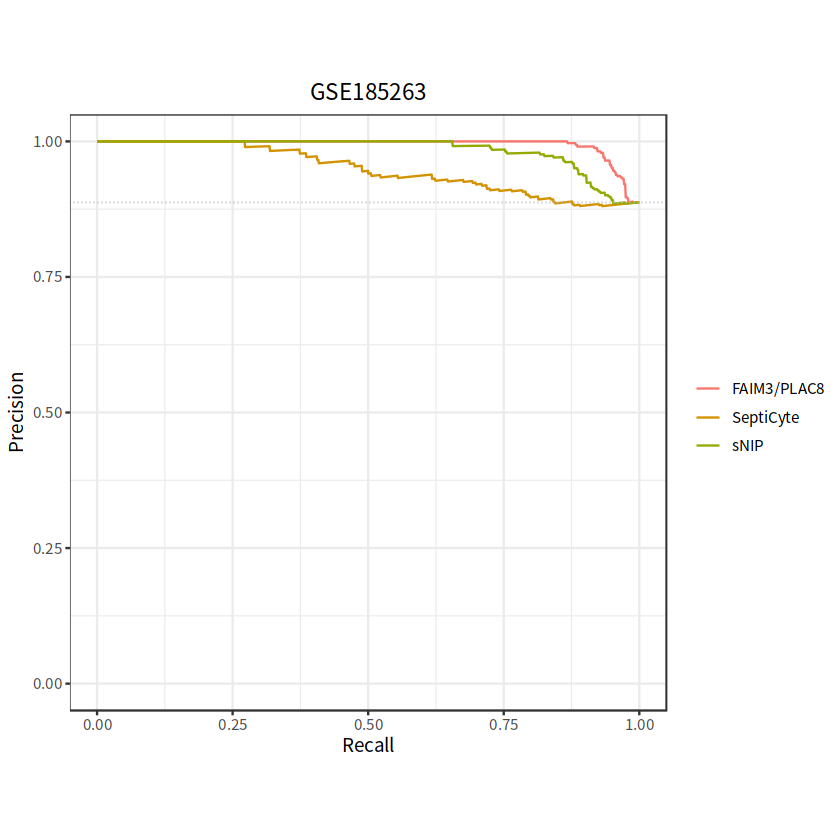

In [498]:
msmdat17 <- mmdata(score7, label7)

# Explicitly specify model names
msmdat27 <- mmdata(score7, label7, modnames = c("FAIM3/PLAC8", "SeptiCyte", "sNIP"))
mscurves7 <- evalmod(msmdat27)
prc_plot7 <- autoplot(mscurves7, "PRC")+ ggtitle("GSE185263") +
  theme(plot.title = element_text(hjust = 0.5))+scale_color_manual(values = custom_colors)
ggsave("../transfer_results/GSE185263prc_plot1.svg", plot = prc_plot7, width = 8, height = 6, dpi = 300, device = "svg")
write.csv(auc(mscurves7), "../transfer_results/GSE185263_info1.csv", row.names = FALSE)
prc_plot7

In [499]:
custom_colors <- c("CaT" = "#00BA38", "K-Nearest Neighbors" = "#00C19F", "Decision Tree" = "#00B9E3", 
                   "Random Forest" = "#619CFF", "Naive Bayes" = "#DB72FB", "Quadratic Discriminant Analysis" = "#FF61C3")


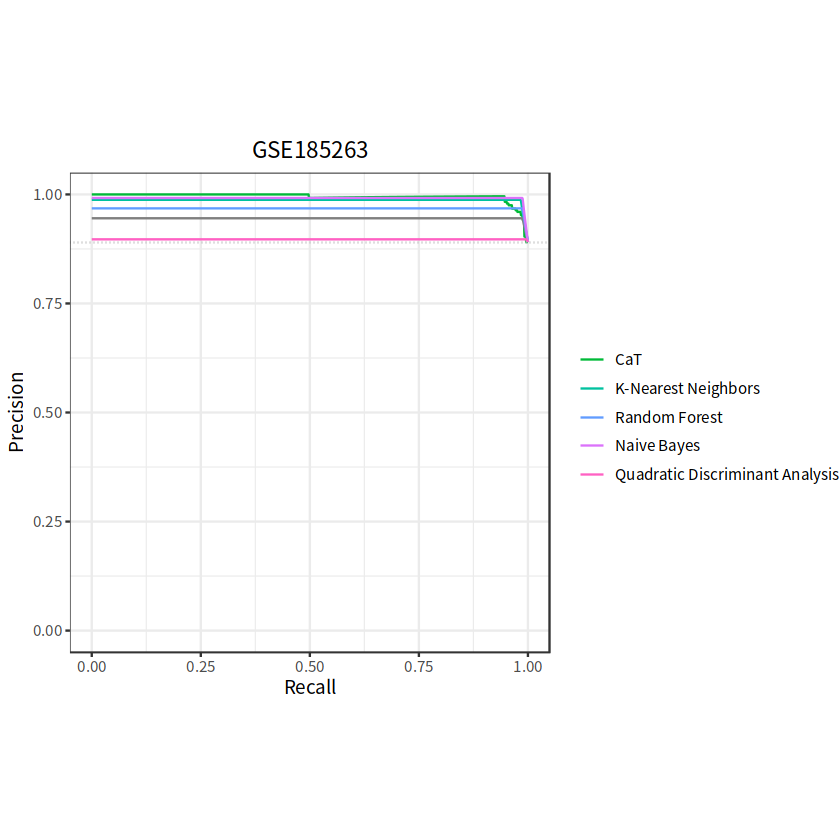

In [500]:
msmdat18 <- mmdata(score8, label8)

# Explicitly specify model names
msmdat28 <- mmdata(score8, label8, modnames = c("CaT", "K-Nearest Neighbors", "DecisionTree", "Random Forest",
                                               "Naive Bayes", "Quadratic Discriminant Analysis"))
mscurves8 <- evalmod(msmdat28)
prc_plot8 <- autoplot(mscurves8, "PRC")+ ggtitle("GSE185263") +
  theme(plot.title = element_text(hjust = 0.5))+scale_color_manual(values = custom_colors)
ggsave("../transfer_results/GSE185263prc_plot2.svg", plot = prc_plot8, width = 8, height = 6, dpi = 300, device = "svg")
write.csv(auc(mscurves8), "../transfer_results/GSE185263_info2.csv", row.names = FALSE)
prc_plot8

In [ ]:
[1] "#F8766D" "#D39200" "#93AA00" "#00BA38" "#00C19F" "#00B9E3" "#619CFF"
[8] "#DB72FB" "#FF61C3"

In [ ]:
#########plot AUPRC  on scRNA-seq Data

In [451]:
#########
yt1 <- read.csv(gzfile("../biomarkers/biomarkers/Comp_FAIM3dPLAC8_y.csv.gz"),header=0)
pd1 <- read.csv(gzfile("../biomarkers/biomarkers/Comp_FAIM3dPLAC8.csv.gz"),header=0)
yt3 = read.csv(gzfile("../biomarkers/biomarkers/Comp_SeptiCyte1_y.csv.gz"),header=0)
pd3 = read.csv(gzfile("../biomarkers/biomarkers/Comp_SeptiCyte1.csv.gz"),header=0)
yt5 = read.csv(gzfile("../biomarkers/biomarkers/Comp_SNIP1_y.csv.gz"),header=0)
pd5 = read.csv(gzfile("../biomarkers/biomarkers/Comp_SNIP1.csv.gz"),header=0)

In [460]:
##use presc
label111 <- join_scores(yt1$V1, yt5$V1
                      )
score111 <- join_scores(pd1$V1, pd5$V1
                      )

In [490]:
custom_colors <- c("FAIM3/PLAC8" = "#F8766D","sNIP" = "#93AA00")

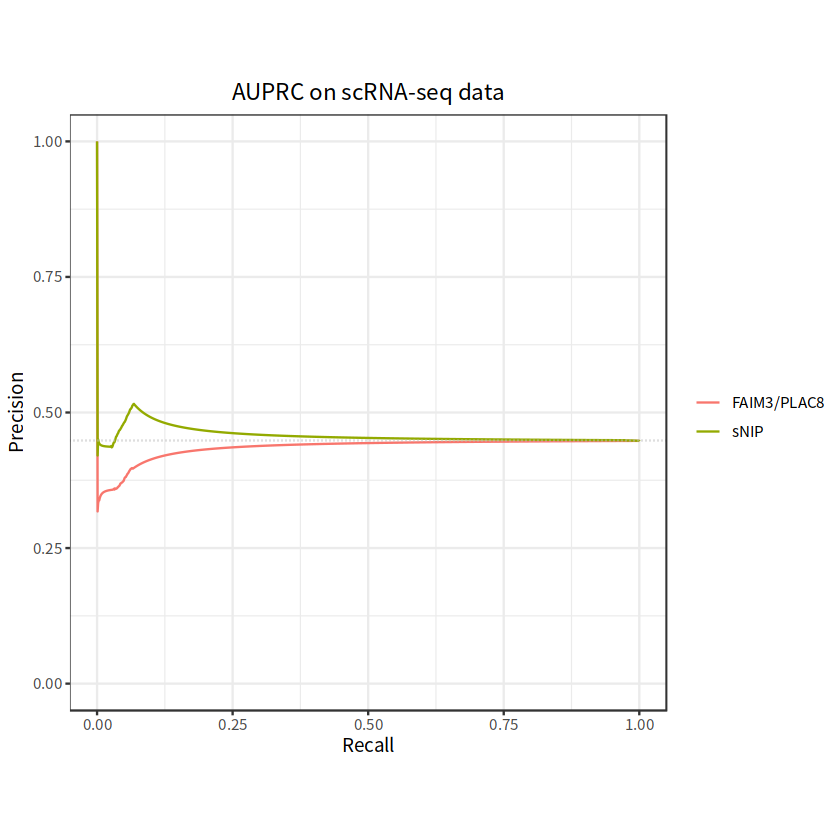

In [492]:
msmdat111 <- mmdata(score111, label111)

# Explicitly specify model names
msmdat111 <- mmdata(score111, label111, modnames = c("FAIM3/PLAC8", "sNIP"))
mscurves111 <- evalmod(msmdat111)
prc_plot111 <- autoplot(mscurves111, "PRC")+ ggtitle("AUPRC on scRNA-seq data") +
  theme(plot.title = element_text(hjust = 0.5))+scale_color_manual(values = custom_colors)
ggsave("../transfer_results/FigAprc_plot1.svg", plot = prc_plot111, width = 8, height = 6, dpi = 300, device = "svg")
write.csv(auc(mscurves111), "../transfer_results/FigA_info1.csv", row.names = FALSE)
prc_plot111

In [463]:
auc(mscurves111)

modnames,dsids,curvetypes,aucs
<chr>,<dbl>,<chr>,<dbl>
FAIM3/PLAC8,1,ROC,0.4919991
FAIM3/PLAC8,1,PRC,0.4352799
sNIP,1,ROC,0.5098876
sNIP,1,PRC,0.4574928


In [488]:
custom_colors <- c("SeptiCyte" = "#D39200")


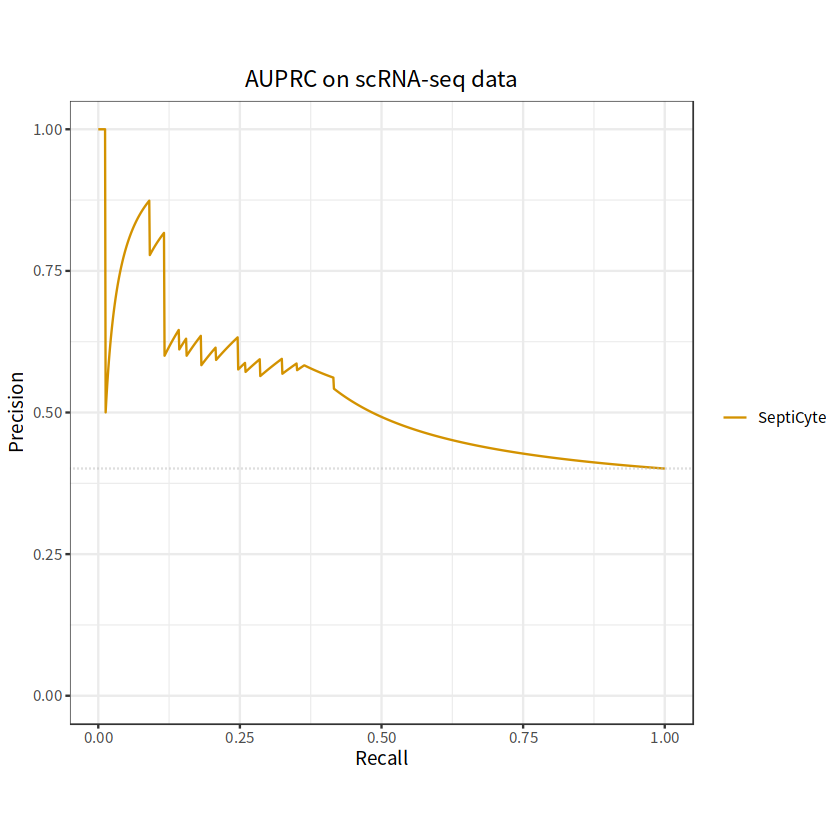

In [489]:
sscurves112 <- evalmod(scores = pd3$V1, labels = yt3$V1,modnames='SeptiCyte')
prc_plot112 <- autoplot(sscurves112, "PRC",show_legend=TRUE)+ ggtitle("AUPRC on scRNA-seq data") +
  theme(plot.title = element_text(hjust = 0.5))+scale_color_manual(values = custom_colors)
ggsave("../transfer_results/FigAprc_plot2.svg", plot = prc_plot112, width = 8, height = 6, dpi = 300, device = "svg")
write.csv(auc(sscurves112), "../transfer_results/FigA_info2.csv", row.names = FALSE)
prc_plot112

In [439]:
yt7 = read.csv("../biomarkers/capsnet_y.csv",header=0)
pd7 = read.csv("../biomarkers/capsnetweighted.csv",header=0)

In [445]:
y_true = read.csv("../biomarkers/y_test.csv",header=0)
y_true

V1
<dbl>
0
0
0
0
0
1
1
1
0


In [447]:
NN_pred = read.csv("../biomarkers/NearestNeighbors.csv",header=0)
DecisionTree_pred = read.csv("../biomarkers/DecisionTree.csv",header=0)
RandomForest_pred = read.csv("../biomarkers/RandomForest.csv",header=0)
NaiveBayes_pred = read.csv("../biomarkers/NaiveBayes.csv",header=0)
QDA_pred = read.csv("../biomarkers/QDA.csv",header=0)

In [473]:
##use presc
label113 <- join_scores(yt7$V1, y_true$V1, y_true$V1, y_true$V1, y_true$V1, y_true$V1
                      )
score113 <- join_scores(pd7$V1, NN_pred$V1, DecisionTree_pred$V1, RandomForest_pred$V1, NaiveBayes_pred$V1, QDA_pred$V1
                      )

In [485]:
custom_colors <- c("CaT" = "#00BA38", "K-Nearest Neighbors" = "#00C19F", "Decision Tree" = "#00B9E3", 
                   "Random Forest" = "#619CFF", "Naive Bayes" = "#DB72FB", "Quadratic Discriminant Analysis" = "#FF61C3")


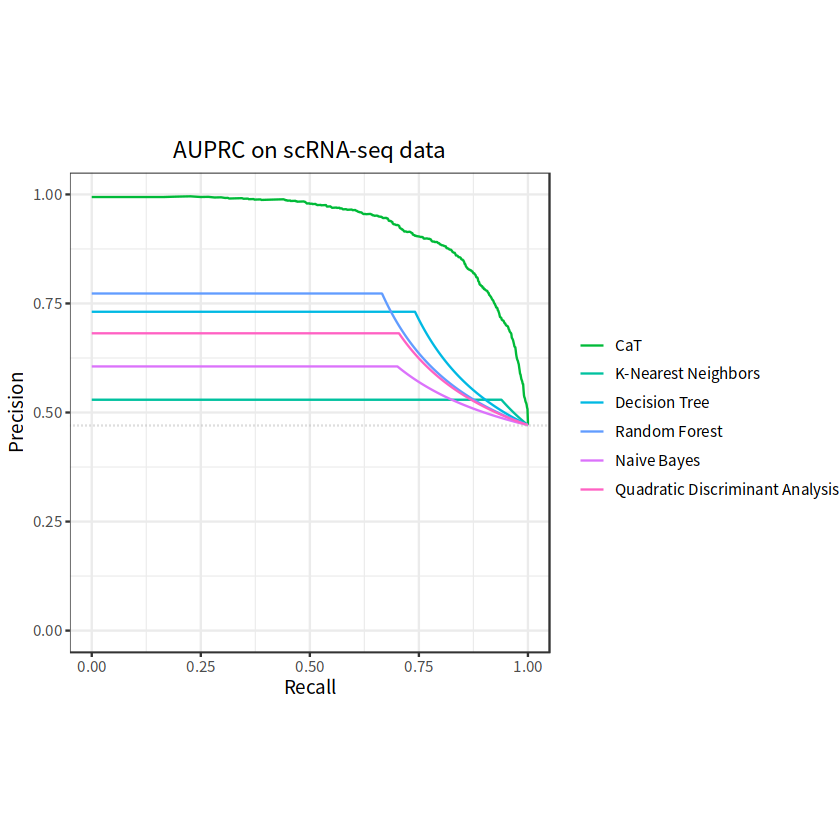

In [486]:
msmdat113 <- mmdata(score113, label113)

# Explicitly specify model names
msmdat113 <- mmdata(score113, label113, modnames = c("CaT", "K-Nearest Neighbors", "Decision Tree", "Random Forest",
                                               "Naive Bayes", "Quadratic Discriminant Analysis"))
mscurves113 <- evalmod(msmdat113)
prc_plot113 <- autoplot(mscurves113, "PRC")+ ggtitle("AUPRC on scRNA-seq data") +
  theme(plot.title = element_text(hjust = 0.5))+scale_color_manual(values = custom_colors)
ggsave("../transfer_results/FigAprc_plot3.svg", plot = prc_plot113, width = 8, height = 6, dpi = 300, device = "svg")
write.csv(auc(mscurves113), "../transfer_results/FigA_info3.csv", row.names = FALSE)
prc_plot113